## Artifact
This is a notebook where all test cases are tested. The mathematics and further details behind the implement solves is well discussed in the pdf file attached named brian_kyanjo_synthesis_duplicate.pdf.  

In [1]:
%matplotlib notebook
%pylab
%reload_ext autoreload
%autoreload 2

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import exact_solver  #Contains the exact solvers
import approximate_solver #Contains approximate solvers
import test #Conatins test cases, Intial and Boundary conditions

In [3]:
#Problem test
case = 4 # 0 = left going shock
         # 1 = right going shock
         # 2 = right going rarefaction
         # 3 = left going rarefaction
         # 4 = dambreak
         # 5 = Allrarefaction
         # 6 = Allshock
         # 7 = left dry state
         # 8 = middle dry state
         # 9 = right dry state

itype = 0 # 0 = no dry states
          # 1 = presence of dry states
    
mq = 1    # mq = 0 : Height field
          # mq = 1 : Momentum field

#choice of the Riemann solver        
solver = 2 # 0 = Roe-solver
           # 1 = flux-decomposition solver
           # 2 = fwave Solver with source term

limiter_choice = 'minmod' #MC 
                          #minmod
                          #superbea
                          #vanleer
                
second_order = True

# Spatial domain
ax = -6
bx = 6

#middle dry state choose: ay = -0.1, by = 0.2
#left dry state choose: ay = -0.1, by = 1.2
#right dry state choose: ay = -0.1, by = 1.2
ay = -0.5    
by = 1

meqn = 2  # Number of equations in the system

# Gravity
g = 1

# Temporal domain
to = 0
Tfinal = 2

# Numerical parameters
cfl = 0.9

mx = 256 #number of spatial points

# Estimate maximum wave speed.  Note that this will change with time, so we have to find a 
# maximum that works for t in [0,T]
umax = 1.7

In [4]:
# Estimate time step and number of time steps to take
dx = (bx-ax)/mx
dt_est = cfl*dx/umax;
nout = int(floor(Tfinal/dt_est) + 1) #number of time steps
dt = Tfinal/nout
xe = linspace(ax,bx,mx+1)  # Edge locations
xc = xe[:-1] + dx/2       # Cell-center locations
tvec = linspace(to,Tfinal,nout+1)

## Sample test and plot

Problem: dam break problem 
 	 hl =  2 
 	 hr =  1 
 	 ul =  0 
 	 ur =  0
solver used is: f-wave
dt = 2.4691e-02
Number of time steps = 81


<IPython.core.display.Javascript object>


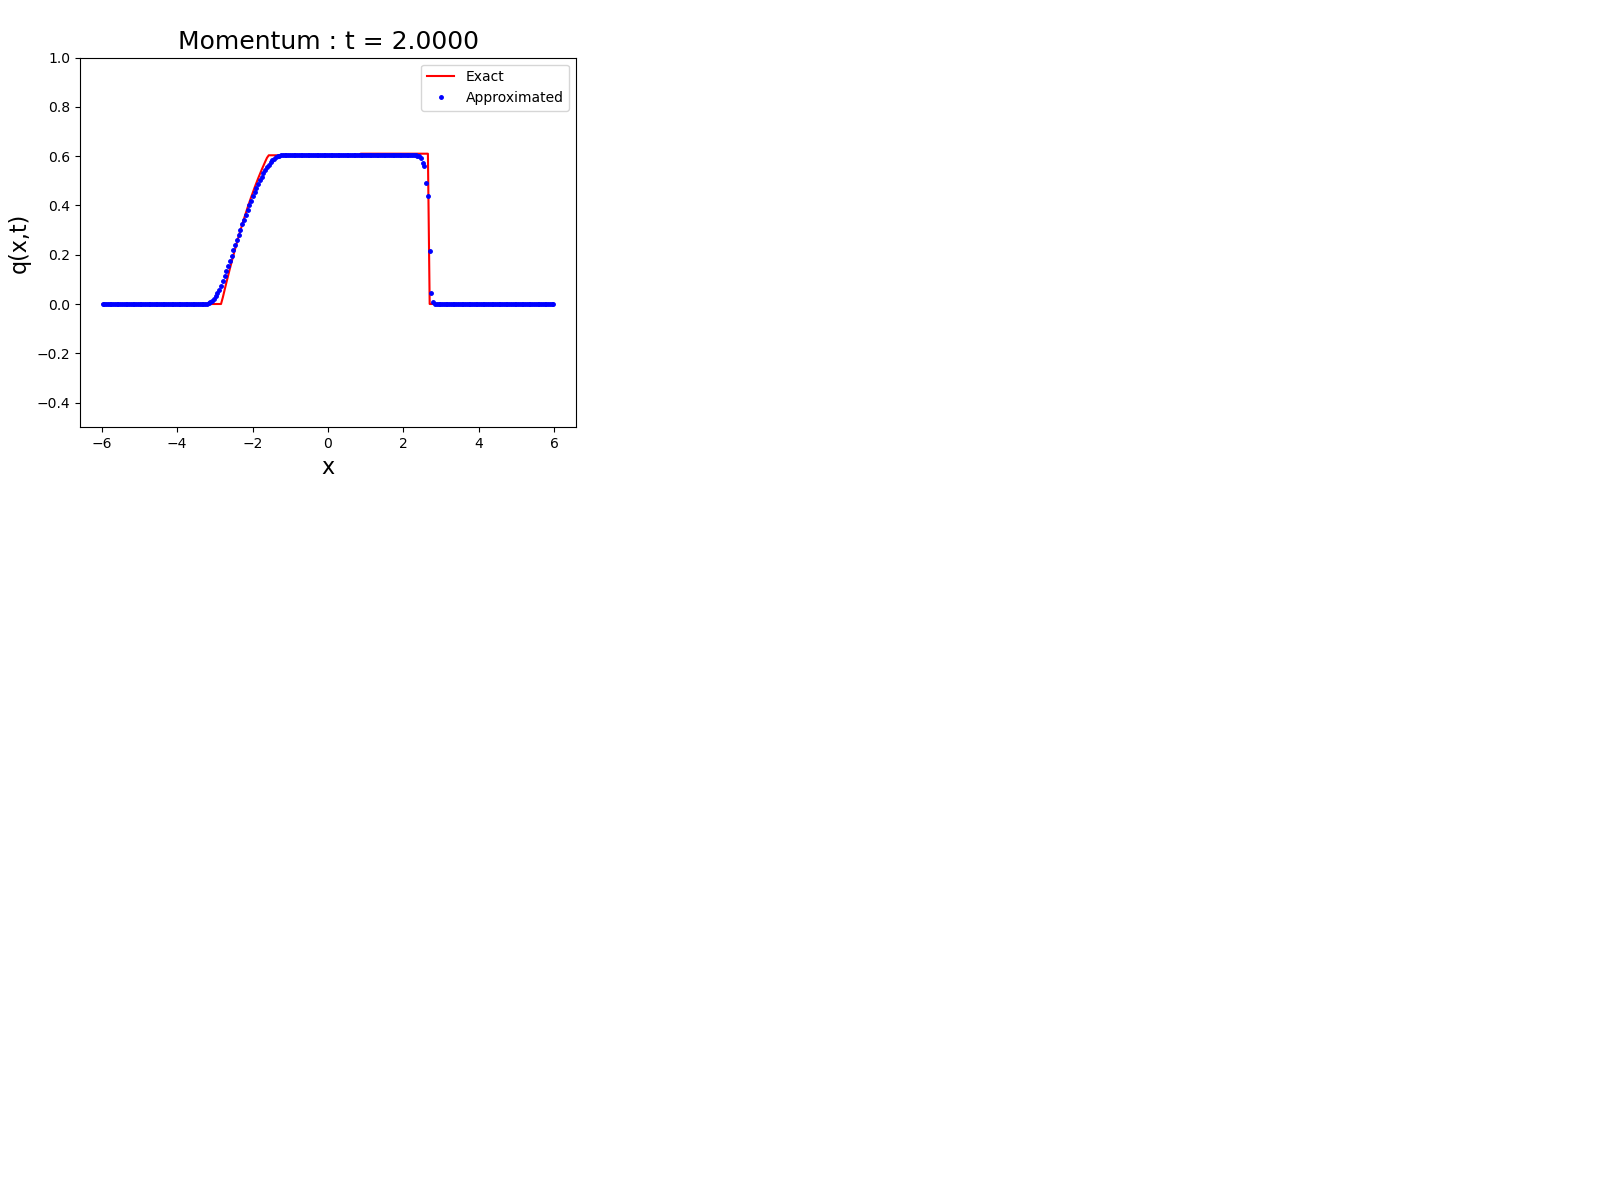

In [5]:
#sample problem test
ql,qr = test.problem_test(case,itype)

#sample graphics
if itype == 1:
    fig = figure(1)
    clf()
    #initialise the exact soln
    qeo = exact_solver.qexact(xc,to,mq,ql,qr,g)
    hde, = plot(xc,qeo,'r-',markersize=5,label='dry_wet')

    if mq == 0:
        tstr = 'Height : t = {:.4f}'
    else:
        tstr = 'Momentum : t = {:.4f}'

    htitle = title(tstr.format(0),fontsize=18)
    #grid()

    for i,t in enumerate(tvec):

        #exact solution
        qe = exact_solver.qexact(xc,t,mq,ql,qr,g)
        hde.set_ydata(qe)

        xlabel('x',fontsize=16)
        ylabel('q(x,t)',fontsize=16)
        htitle.set_text(tstr.format(t))

        legend()

        ylim([ay,by])

        pause(0.1)
        #savefig('/Users/mathadmin/Documents/phd-research/comprehensive_exam/synthesis_paper/images/rr')

        fig.canvas.draw()        

elif itype == 0:
    Q,xc,tvec = approximate_solver.claw(ax,bx, mx,  Tfinal, nout,ql,qr, \
              meqn=meqn, \
              exact=exact_solver.exact,\
              solver=solver, \
              qinit=test.qinit, \
              bc=test.bc_extrap, \
              limiter_choice=limiter_choice,
              second_order=second_order)

    fig = figure(1)
    clf()

    #initialise the exact soln
    qeo = exact_solver.qexact(xc,to,mq,ql,qr,g)
    hde, = plot(xc,qeo,'r-',markersize=5,label='Exact')

    q0 = Q[:,mq,0]
    hdl, = plot(xc,q0,'b.',markersize=5,label='Approximated')

    if mq == 0:
        tstr = 'Height : t = {:.4f}'
    else:
        tstr = 'Momentum : t = {:.4f}'

    htitle = title(tstr.format(0),fontsize=18)

    for i,t in enumerate(tvec):

        #exact solution
        qe = exact_solver.qexact(xc,t,mq,ql,qr,g)
        hde.set_ydata(qe)

        #wpa
        q = Q[:,mq,i]
        hdl.set_ydata(q)

        xlabel('x',fontsize=16)
        ylabel('q(x,t)',fontsize=16)
        htitle.set_text(tstr.format(t))

        legend()

        ylim([ay,by])

        pause(0.1)
        #savefig('/Users/mathadmin/Documents/phd-research/comprehensive_exam/synthesis_paper/images/rr')

        fig.canvas.draw()      